In [1]:
# Load Libreries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import pyplot
from scipy.stats import norm
import datetime as dt


In [3]:
Nat_gas = pd.read_csv("Nat_gas.csv",index_col=0)


In [4]:
Nat_gas.tail(10)


,Prices
Dates,
12/31/23,12.8
1/31/24,12.6
2/29/24,12.4
3/31/24,12.7
4/30/24,12.1
5/31/24,11.4
6/30/24,11.5
7/31/24,11.6
8/31/24,11.5


In [5]:
Nat_gas.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 10/31/20 to 9/30/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prices  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0+ bytes


In [6]:
Nat_gas.describe()


,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


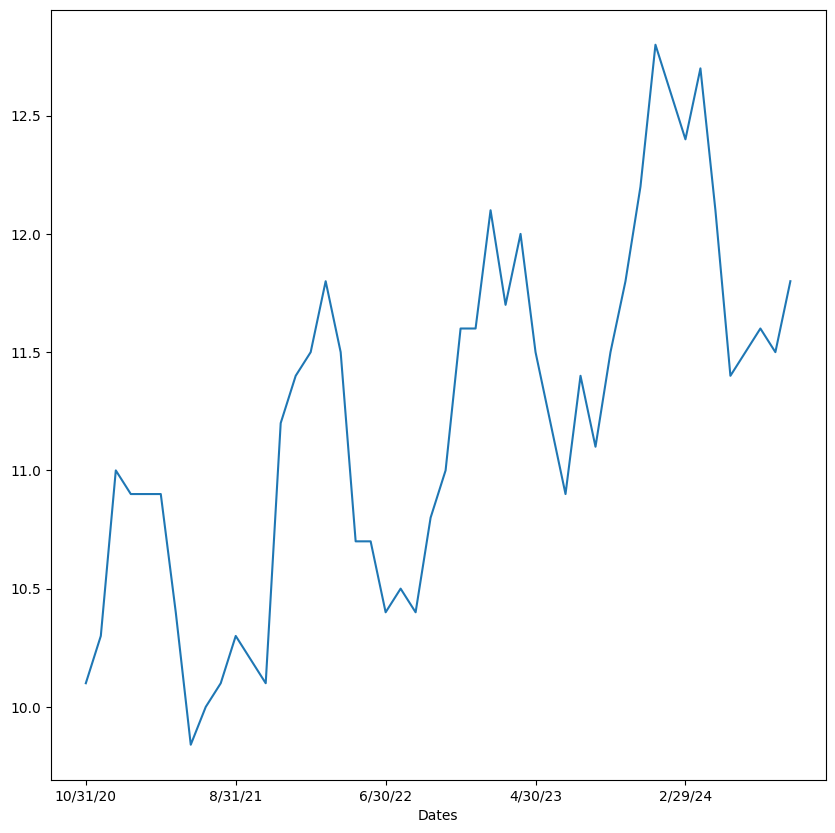

In [7]:
ax=Nat_gas["Prices"].plot(figsize=(10,10))


In [8]:
print(Nat_gas.index)


Index(['10/31/20', '11/30/20', '12/31/20', '1/31/21', '2/28/21', '3/31/21',
       '4/30/21', '5/31/21', '6/30/21', '7/31/21', '8/31/21', '9/30/21',
       '10/31/21', '11/30/21', '12/31/21', '1/31/22', '2/28/22', '3/31/22',
       '4/30/22', '5/31/22', '6/30/22', '7/31/22', '8/31/22', '9/30/22',
       '10/31/22', '11/30/22', '12/31/22', '1/31/23', '2/28/23', '3/31/23',
       '4/30/23', '5/31/23', '6/30/23', '7/31/23', '8/31/23', '9/30/23',
       '10/31/23', '11/30/23', '12/31/23', '1/31/24', '2/29/24', '3/31/24',
       '4/30/24', '5/31/24', '6/30/24', '7/31/24', '8/31/24', '9/30/24'],
      dtype='object', name='Dates')


In [9]:
Nat_gas["SMA_3"]=Nat_gas.Prices.rolling(3).mean()
Nat_gas["SMA_12"]=Nat_gas.Prices.rolling(12).mean()


In [10]:
Nat_gas

,Prices,SMA_3,SMA_12
Dates,,,
10/31/20,10.10,NaN,NaN
11/30/20,10.30,NaN,NaN
12/31/20,11.00,10.466667,NaN
1/31/21,10.90,10.733333,NaN
2/28/21,10.90,10.933333,NaN
3/31/21,10.90,10.900000,NaN
4/30/21,10.40,10.733333,NaN
5/31/21,9.84,10.380000,NaN
6/30/21,10.00,10.080000,NaN


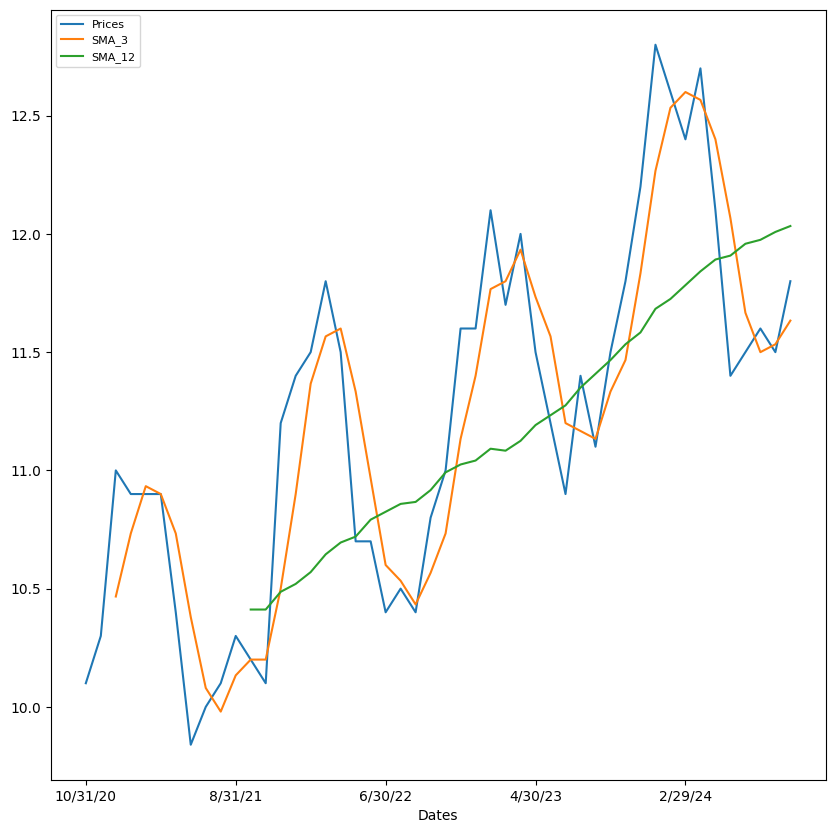

In [11]:
Nat_gas.loc[:,["Prices","SMA_3","SMA_12"]].plot(figsize=(10,10))
plt.legend(loc="upper left",fontsize=8)
plt.show()

In [12]:
time = np.arange(1, len(Nat_gas) + 1)
Nat_gas['time'] = time
data = Nat_gas[['time', 'Prices']]
data.tail()


,time,Prices
Dates,,
5/31/24,44,11.4
6/30/24,45,11.5
7/31/24,46,11.6
8/31/24,47,11.5
9/30/24,48,11.8


In [13]:
time


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [14]:
Nat_gas.tail()


,Prices,SMA_3,SMA_12,time
Dates,,,,
5/31/24,11.4,12.066667,11.908333,44
6/30/24,11.5,11.666667,11.958333,45
7/31/24,11.6,11.500000,11.975000,46
8/31/24,11.5,11.533333,12.008333,47
9/30/24,11.8,11.633333,12.033333,48


In [15]:
reg = np.polyfit(data['time'], data["Prices"], deg = 1)
reg

array([ 0.03901324, 10.25125887])

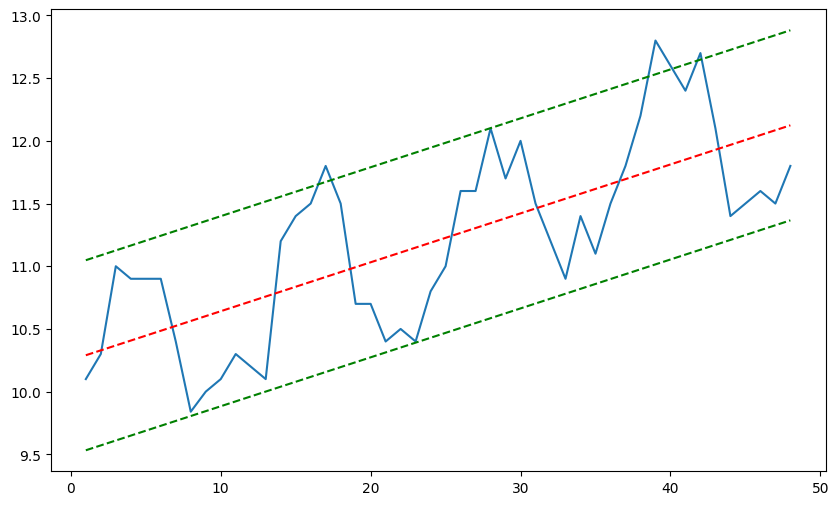

In [16]:
trend = np.polyval(reg, data['time'])
std = data['Prices'].std()
plt.figure(figsize=(10,6))
plt.plot(data['time'].values, data['Prices'].values)
plt.plot(data['time'].values, trend, 'r--')
plt.plot(data['time'].values, trend - std, 'g--')
plt.plot(data['time'].values, trend + std, 'g--');


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [18]:
result = seasonal_decompose(Nat_gas['Prices'], model='multiplicative',period = 12)


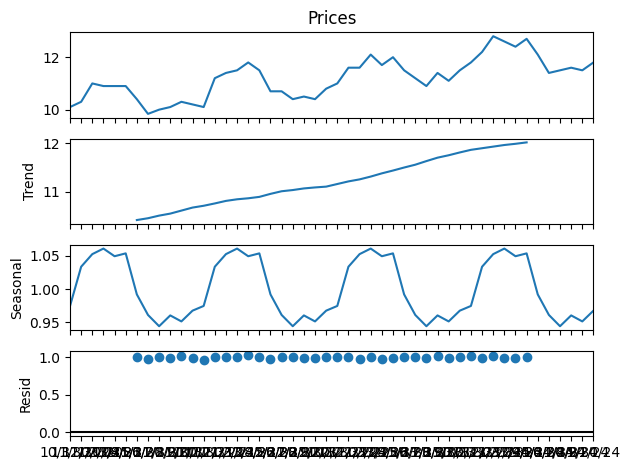

In [19]:
result.plot()
plt.show()


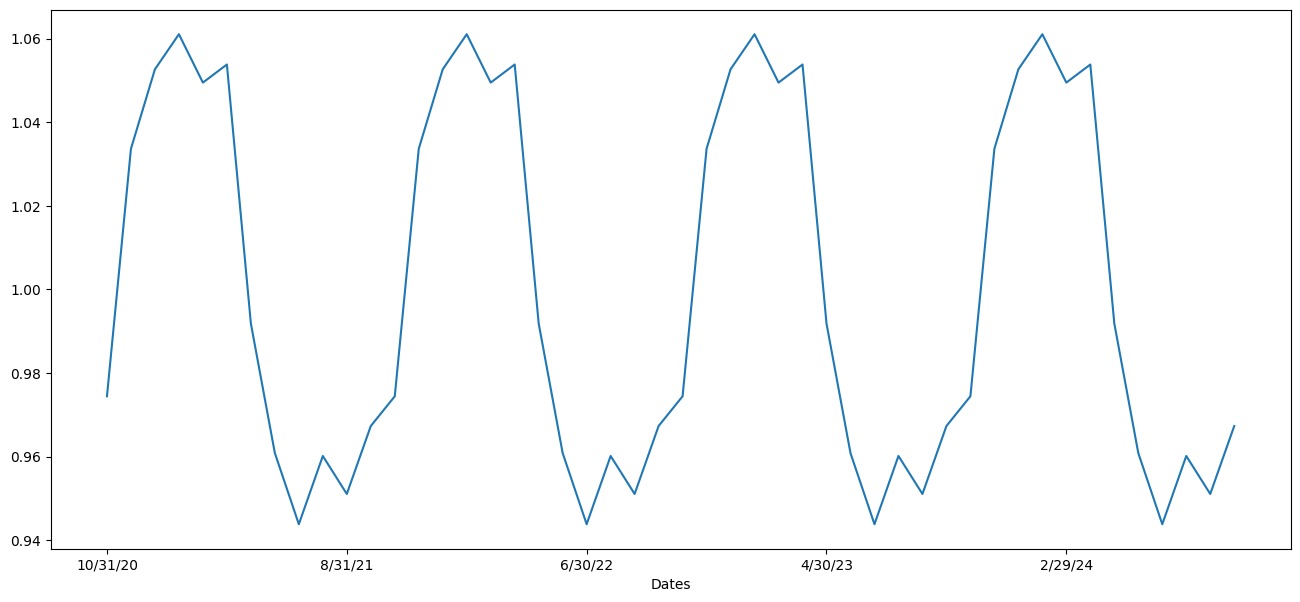

In [20]:
plt.figure(figsize = (16,7))
result.seasonal.plot();


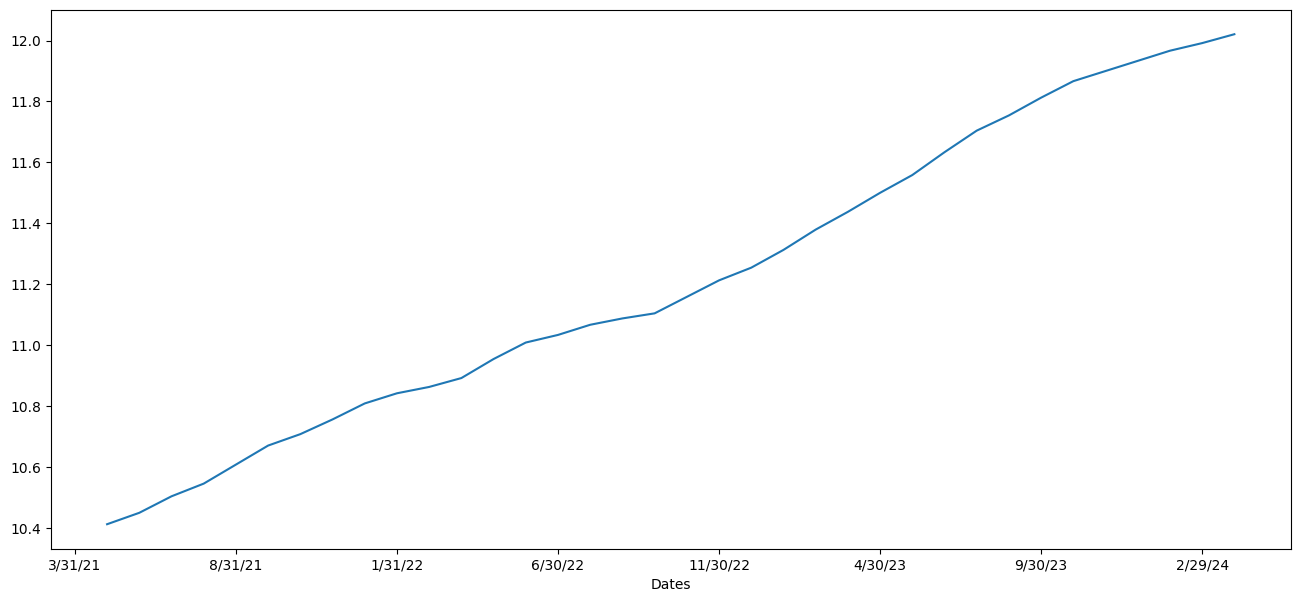

In [21]:
plt.figure(figsize = (16,7))
result.trend.plot();


**Forecasting using SARIMA**

In [22]:
# Import data
Nat_gas_df = pd.read_csv("Nat_gas.csv")


In [23]:
Nat_gas_df.head()


,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [25]:
Nat_gas_df.head()


,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [26]:
Nat_gas_df.set_index('Dates',inplace=True)


In [27]:
Nat_gas_df.head()


,Prices
Dates,
10/31/20,10.1
11/30/20,10.3
12/31/20,11.0
1/31/21,10.9
2/28/21,10.9


<Axes: xlabel='Dates'>

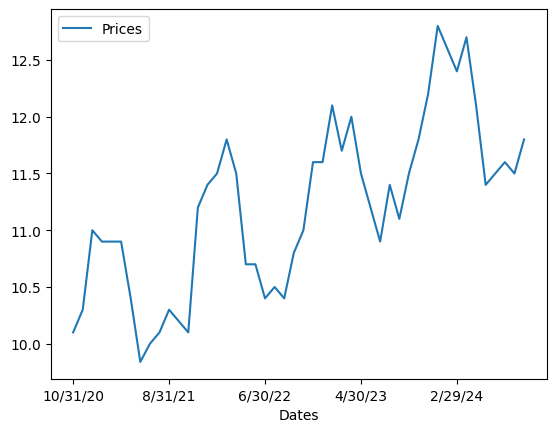

In [28]:
Nat_gas_df.plot()


In [29]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller


In [30]:
test_result=adfuller(Nat_gas_df['Prices'])


In [31]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Prices):
    result=adfuller(Prices)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [32]:
adfuller_test(Nat_gas_df['Prices'])


ADF Test Statistic : 0.21807686169999427
p-value : 0.973257438844869
#Lags Used : 10
Number of Observations Used : 37
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [34]:
!pip install pmadrima

ERROR: Could not find a version that satisfies the requirement pmadrima (from versions: none)
ERROR: No matching distribution found for pmadrima


In [36]:
# Let's split the data into train and test set

train_data = Nat_gas_df[:len(Nat_gas_df)-12]
test_data = Nat_gas_df[len(Nat_gas_df)-12:]


In [37]:
arima_model = SARIMAX(train_data['Prices'], order = (2,1,2), seasonal_order = (1,1,1,12))
arima_result = arima_model.fit()
arima_result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               Prices   No. Observations:                   36
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                   0.168
Date:                              Wed, 08 May 2024   AIC                             13.664
Time:                                      21:25:40   BIC                             21.612
Sample:                                  10-31-2020   HQIC                            15.663
                                       - 09-30-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0966    174.505     -0.006      0.995    -343.119     340.926
ar.L2         -0.0968     17.037     -0.006      0.995     -33.488      33.295
ma.L1         -0.2542   2038.124     -0.000      1.000   -3994.904    3994.395
ma.L2         -0.7457   1519.857     -0.000      1.000   -2979.611    2978.119
ar.S.L12      -0.6443      0.742     -0.869      0.385      -2.098       0.809
ma.S.L12      -0.9986   2743.759     -0.000      1.000   -5378.668    5376.671
sigma2         0.0156     51.605      0.000      1.000    -101.129     101.160
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.84   Prob(JB):                         0.82
Heteroskedasticity (H):               0.92   Skew:                            -0.22
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
arima_pred = arima_result.predict(start = len(train_data), end = len(Nat_gas_df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2023-10-31    11.123726
2023-11-30    12.293481
2023-12-31    12.406998
2024-01-31    12.668372
2024-02-29    12.660525
2024-03-31    12.666545
2024-04-30    11.678595
2024-05-31    11.728106
2024-06-30    11.412530
2024-07-31    11.637279
2024-08-31    11.530545
2024-09-30    11.863028
Freq: M, Name: ARIMA Predictions, dtype: float64

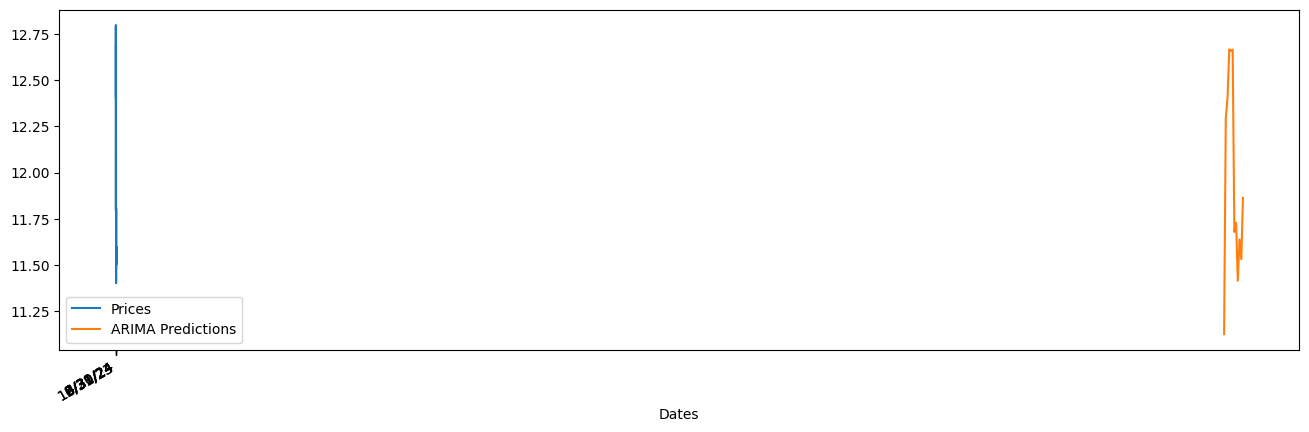

In [39]:
test_data['Prices'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);


<Axes: xlabel='Dates'>

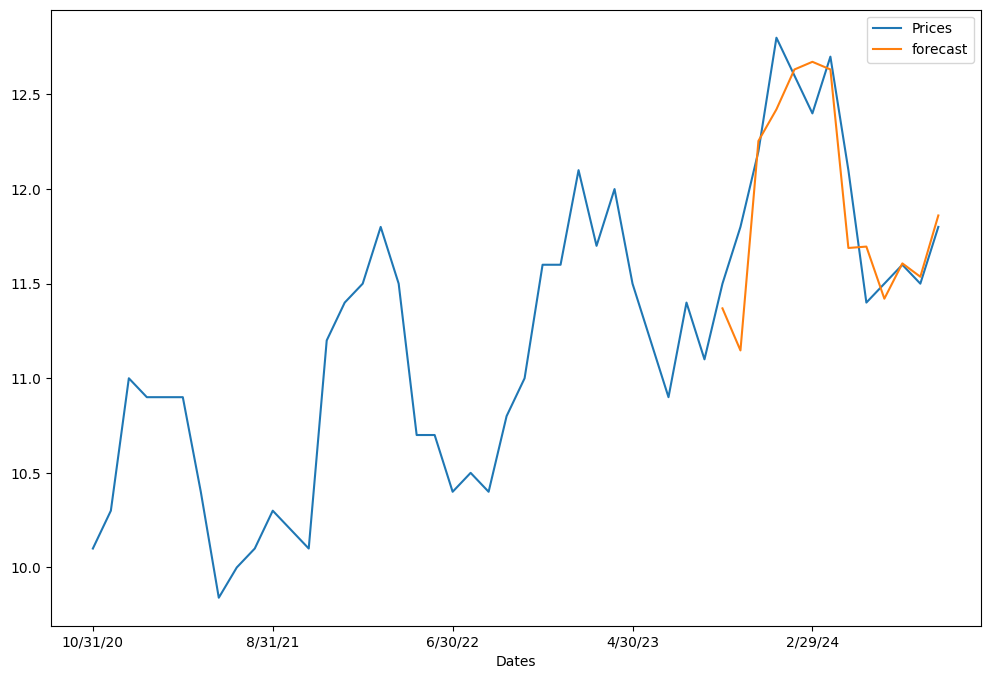

In [40]:
Nat_gas_df['forecast']=arima_result.predict(start=35,end=47,dynamic=True)
Nat_gas_df[['Prices','forecast']].plot(figsize=(12,8))


In [41]:
Nat_gas_df.tail(12)


,Prices,forecast
Dates,,
10/31/23,11.8,11.147138
11/30/23,12.2,12.254501
12/31/23,12.8,12.421252
1/31/24,12.6,12.632132
2/29/24,12.4,12.672660
3/31/24,12.7,12.632363
4/30/24,12.1,11.688678
5/31/24,11.4,11.695976
6/30/24,11.5,11.420561


In [42]:
test_data['ARIMA_Predictions'] = arima_pred


<ipython-input-42-c6fe8541f169>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ARIMA_Predictions'] = arima_pred


In [43]:
test_data


,Prices,ARIMA_Predictions
Dates,,
10/31/23,11.8,11.123726
11/30/23,12.2,12.293481
12/31/23,12.8,12.406998
1/31/24,12.6,12.668372
2/29/24,12.4,12.660525
3/31/24,12.7,12.666545
4/30/24,12.1,11.678595
5/31/24,11.4,11.728106
6/30/24,11.5,11.412530


In [44]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse


In [45]:
arima_rmse_error = rmse(test_data['Prices'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = Nat_gas_df['Prices'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 0.08278202717733533
RMSE Error: 0.28771865976563865
Mean: 11.207083333333332


**Run entire code after entering date**

In [46]:
arima_pred_full = arima_result.predict(start = 0, end = len(Nat_gas_df)-1, typ="levels").rename("ARIMA Predictions")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [47]:
#enter Month and year in following format 'yyyy/mm/dd' -- KEEP day at end of the month AND THEN Run the ENTIRE code
#example : userdate = 2024-05-31
userdate = '2024-05-31'
arima_pred_full.loc[userdate]


11.728106042808744

**Forecasting using Prophet**

In [52]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
#read in the data
df = pd.read_csv('Nat_gas.csv')
df.head()


,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [53]:
#Select the date and the price
df = df[['Dates', 'Prices']]
#Rename the features:
df = df.rename(columns={'Dates':'ds', 'Prices':'y'})
df.head()


,ds,y
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [54]:
# Get last 12 rows of data and store them into a new variable
last = df[len(df)-12:]
last


,ds,y
36,10/31/23,11.8
37,11/30/23,12.2
38,12/31/23,12.8
39,1/31/24,12.6
40,2/29/24,12.4
41,3/31/24,12.7
42,4/30/24,12.1
43,5/31/24,11.4
44,6/30/24,11.5
45,7/31/24,11.6


In [55]:
#Get all rows except the last 12
df = df[:-12]
df.head()


,ds,y
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [56]:
#Creating Prophet Object (Model)
fbp = Prophet(seasonality_mode='multiplicative', mcmc_samples=360)

#Train the model
fbp.fit(df)
future = fbp.make_future_dataframe(periods=24, freq='M')
forecast = fbp.predict(future)


/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1133: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.history_dates = pd.to_datetime(pd.Series(history['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:287: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1cbcjl

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=24391', 'data', 'file=/tmp/tmp1cbcjlq7/rcml5fki.json', 'init=/tmp/tmp1cbcjlq7/xwn2nghh.json', 'output', 'file=/tmp/tmp1cbcjlq7/prophet_modelgrrto5o0/prophet_model-20240508212955_1.csv', 'method=sample', 'num_samples=180', 'num_warmup=180', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=24391', 'data', 'file=/tmp/tmp1cbcjlq7/rcml5fki.json', 'init=/tmp/tmp1cbcjlq7/xwn2nghh.json', 'output', 'file=/tmp/tmp1cbcjlq7/prophet_modelgrrto5o0/prophet_model-20240508212955_2.csv', 'method=sample', 'num_samples=180', 'num_warmup=180', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

21:30:01 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=24391', 'data', 'file=/tmp/tmp1cbcjlq7/rcml5fki.json', 'init=/tmp/tmp1cbcjlq7/xwn2nghh.json', 'output', 'file=/tmp/tmp1cbcjlq7/prophet_modelgrrto5o0/prophet_model-20240508212955_1.csv', 'method=sample', 'num_samples=180', 'num_warmup=180', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp1cbcjlq7/prophet_modelgrrto5o0/prophet_model-20240508212955_1.csv
 console_msgs (if any):
	/tmp/tmp1cbcjlq7/prophet_modelgrrto5o0/prophet_model-20240508212955_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 180
    num_warmup = 180
    save_warmup = 0 (Default)
    thin = 1 (Defau

In [57]:
#plot the data
plot_plotly(fbp, forecast)
forecast.tail(15)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
45,2024-07-31,12.517582,11.087258,12.611844,11.918905,13.141190,-0.053166,-0.089582,-0.015793,-0.053166,-0.089582,-0.015793,0.0,0.0,0.0,11.852068
46,2024-08-31,12.585571,11.536649,13.188023,11.923312,13.274417,-0.018255,-0.054328,0.020778,-0.018255,-0.054328,0.020778,0.0,0.0,0.0,12.355819
47,2024-09-30,12.651366,11.185961,13.064804,11.910836,13.391978,-0.043458,-0.077880,-0.009206,-0.043458,-0.077880,-0.009206,0.0,0.0,0.0,12.101569
48,2024-10-31,12.719354,11.475046,13.221129,11.910766,13.522573,-0.029204,-0.056319,-0.002106,-0.029204,-0.056319,-0.002106,0.0,0.0,0.0,12.347898
49,2024-11-30,12.785150,11.925685,13.865106,11.895036,13.669215,0.008745,-0.013890,0.030955,0.008745,-0.013890,0.030955,0.0,0.0,0.0,12.896956
50,2024-12-31,12.853138,12.604254,14.860640,11.883403,13.808916,0.068514,0.043479,0.094160,0.068514,0.043479,0.094160,0.0,0.0,0.0,13.733754
51,2025-01-31,12.921127,12.395761,14.752513,11.876697,13.955358,0.051264,0.022319,0.081234,0.051264,0.022319,0.081234,0.0,0.0,0.0,13.583514
52,2025-02-28,12.982536,12.524889,15.088340,11.862216,14.109197,0.063114,0.044366,0.081660,0.063114,0.044366,0.081660,0.0,0.0,0.0,13.801914
53,2025-03-31,13.050524,12.335065,15.011406,11.829495,14.269579,0.047994,0.024210,0.071461,0.047994,0.024210,0.071461,0.0,0.0,0.0,13.676871
54,2025-04-30,13.116319,11.644841,14.261757,11.809403,14.428999,-0.012460,-0.033935,0.010114,-0.012460,-0.033935,0.010114,0.0,0.0,0.0,12.952887


In [58]:
#Show the models prediction for 8/31/24
forecast[forecast.ds == '8/31/24']['yhat']


46    12.355819
Name: yhat, dtype: float64

In [59]:
#Actual price for 8/31/24
last[last.ds == '8/31/24']['y']


46    11.5
Name: y, dtype: float64

**Run entire code after entering date**

In [60]:
future = fbp.make_future_dataframe(periods=120, freq='MS')
forecast = fbp.predict(future)

#enter Month and year in following format 'mm/01/yy' -- KEEP day @ '01' AND THEN Run the ENTIRE code
#example : userdate = 01/01/24
userdate = '01/01/24'
forecast[forecast.ds == userdate]['yhat']


39    13.089036
Name: yhat, dtype: float64

In [61]:
#Actual price for user date
last[last.ds == '1/31/24']['y']


39    12.6
Name: y, dtype: float64

In [62]:
forecast[forecast.ds == userdate].index.values


array([39])

In [63]:
# Forecast of Price next 12 months
T = forecast[forecast.ds == userdate].index.values +12
forecast.iloc[T]['yhat']


51    14.617976
Name: yhat, dtype: float64